In [123]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import glob

In [124]:
def create_dataset_from_paths(paths, labels, size=20, scale=16):
    """
    Process images from given paths and labels into a normalized DataFrame.
    
    Parameters:
    paths : list of str
        List of paths to grayscale images
    labels : list of int
        Corresponding labels for each image
    size : int
        Resize dimension (size x size)
    scale : int
        Scaling factor for pixel normalization (default 16 like sklearn digits)
    
    Returns:
    df : pd.DataFrame
        DataFrame with flattened pixels + 'target' column
    """
    processed_images = []

    for path in paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise ValueError(f"Image not found or cannot be read: {path}")
        
        # Resize
        resized = cv2.resize(img, (size, size), interpolation=cv2.INTER_AREA)
        # Invert colors
        inverted = 255 - resized
        # Normalize
        normalized = (inverted / 255 * scale).astype(int)
        # Flatten
        processed_images.append(normalized.flatten())
    
    # Create DataFrame
    df = pd.DataFrame(
        data=processed_images,
        columns=[f'pixel_{i}' for i in range(size*size)]
    )
    df['target'] = labels
    
    return df


In [125]:
image_paths = [
    '/kaggle/input/digitsdata/0.png',
    '/kaggle/input/digitsdata/1.png',
    '/kaggle/input/digitsdata/2.png',
    '/kaggle/input/digitsdata/3.png',
    '/kaggle/input/digitsdata/4.png',
    '/kaggle/input/digitsdata/5.png',
    '/kaggle/input/digitsdata/6.png',
    '/kaggle/input/digitsdata/7.png',
    '/kaggle/input/digitsdata/8.png',
    '/kaggle/input/digitsdata/9.png'
]

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

df = create_dataset_from_paths(image_paths, labels, size=20, scale=16)

X_train = df.drop('target', axis=1).values
y_train = df['target'].values  

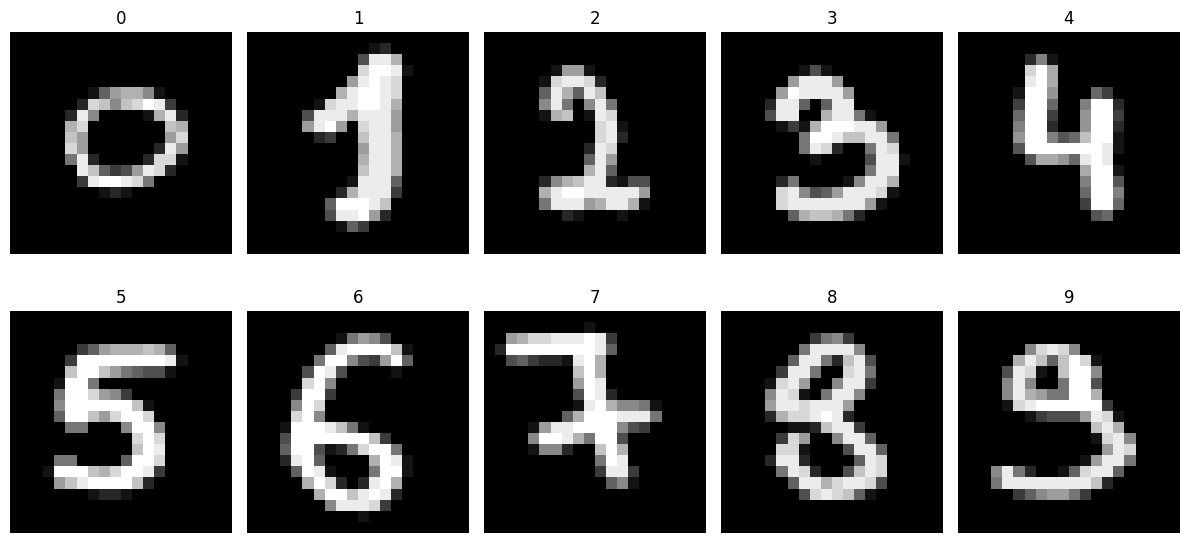

In [126]:
plt.figure(figsize=(12, 6))

rows = 2
cols = 5

for i in range(10):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(df.iloc[i, :-1].values.reshape(20,20), cmap='gray', interpolation='nearest')
    plt.title(f"{df['target'][i]}", fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X = np.array(processed_images, dtype=np.float32)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

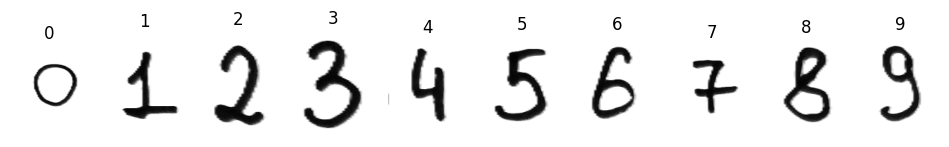

In [128]:
image_path = '/kaggle/input/digits2'
files = sorted([f for f in os.listdir(image_path) if f.endswith('.png')])

image = []

for f in files:
    path = os.path.join(image_path, f)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        image.append(img) 

fig, axes = plt.subplots(1, len(image), figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(image[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'{files[i].split(".")[0]}')
plt.show()

In [129]:
X = []
y = []

In [130]:
image_paths = [
    '/kaggle/input/digitsdata/0.png',
    '/kaggle/input/digitsdata/1.png',
    '/kaggle/input/digitsdata/2.png',
    '/kaggle/input/digitsdata/3.png',
    '/kaggle/input/digitsdata/4.png',
    '/kaggle/input/digitsdata/5.png',
    '/kaggle/input/digitsdata/6.png',
    '/kaggle/input/digitsdata/7.png',
    '/kaggle/input/digitsdata/8.png',
    '/kaggle/input/digitsdata/9.png'
]

labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

df_test = create_dataset_from_paths(image_paths, labels, size=20, scale=16)

X_test = df_test.drop('target', axis=1).values
y_test = df_test['target'].values

In [137]:
# Використовуємо df_test (10 зображень)
X_test = df_test.drop('target', axis=1).values
y_test = df_test['target'].values

# Робимо передбачення для кожного зображення
predicted_labels = knn.predict(X_test)

# Створюємо "матрицю" для візуалізації
matrix = []

for label in predicted_labels:
    # повторюємо label кілька разів для рядка (наприклад 6 разів)
    matrix.append([label] * 30)

matrix = np.array(matrix)
print("Predicted matrix:")
print(matrix)


Predicted matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]



Confusion matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]]


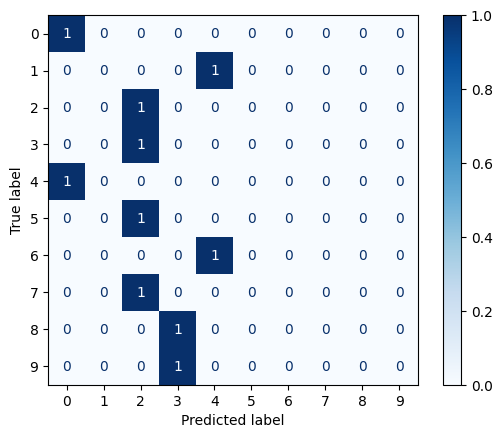

In [132]:
# =====================================================
# 5. Confusion matrix
# =====================================================
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("\nConfusion matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap="Blues")
plt.show()

In [133]:
# =====================================================
# 6. TP, FP, FN, TN for each digit
# =====================================================
metrics = {}
n_classes = len(digits.target_names)

for i in range(n_classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    metrics[i] = {"TP": TP, "FP": FP, "FN": FN, "TN": TN}

print("\nMetrices for each digit:")
for digit, m in metrics.items():
    print(f"Digit {digit}: TP={m['TP']}  FP={m['FP']}  FN={m['FN']}  TN={m['TN']}")


Metrices for each digit:
Digit 0: TP=1  FP=1  FN=0  TN=8
Digit 1: TP=0  FP=0  FN=1  TN=9
Digit 2: TP=1  FP=3  FN=0  TN=6
Digit 3: TP=0  FP=2  FN=1  TN=7
Digit 4: TP=0  FP=2  FN=1  TN=7
Digit 5: TP=0  FP=0  FN=1  TN=9
Digit 6: TP=0  FP=0  FN=1  TN=9
Digit 7: TP=0  FP=0  FN=1  TN=9
Digit 8: TP=0  FP=0  FN=1  TN=9
Digit 9: TP=0  FP=0  FN=1  TN=9
